# Comparing Urban and Rural Streams
In this notebook we'll compare the hydrology of two streams in the Baltimore area:
* [Grave Run](https://waterdata.usgs.gov/md/nwis/uv?site_no=01581830), a rural stream with only 0.3% impervious surfaces, and
* [Dead Run](https://waterdata.usgs.gov/md/nwis/uv?site_no=01589330), an urban stream that is 39% impervious surfaces.

These two watersheds are similar in size, topography, and geology. They also have very emo names.

In [1]:
# Start with the usual.
import hydrofunctions as hf
%matplotlib inline
hf.__version__

'0.1.8dev'

```python
# Use HydroCloud.org to find two appropriate sites. I've selected Grave Run and Dead Run. /n
# You can find the size and percent imperviousness of the site in the Table View.
hf.draw_map()
```
![The table view of our two sites.](_static/HydroCloudTable.png)

In [2]:
# request data for our two sites for a three-year period.
sites = ['01581830', '01589330']
request = hf.NWIS(sites, start_date='2002-01-01', end_date='2005-01-01')
request.ok # Verify that the data request went fine.

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=01581830%2C01589330&startDT=2002-01-01&endDT=2005-01-01


True

In [3]:
# We'll store our discharge data in a dataframe named 'Q'
Q = request.df('discharge')
Q.head()  # Print the first five rows to verify.

,USGS:01581830:00060:00003,USGS:01589330:00060:00003
datetime,,
2002-01-01 00:00:00+00:00,3.20,0.60
2002-01-02 00:00:00+00:00,3.20,0.61
2002-01-03 00:00:00+00:00,3.30,0.60
2002-01-04 00:00:00+00:00,3.20,0.64
2002-01-05 00:00:00+00:00,4.18,0.60


In [4]:
# What are the names for our two sites?
request.siteName

['GRAVE RUN NEAR BECKLEYSVILLE, MD', 'DEAD RUN AT FRANKLINTOWN, MD']

In [5]:
# Rename the columns to 'Urban' and 'Rural' so we remember which is which!
Q = Q.rename(columns={"USGS:01581830:00060:00003": "Rural", "USGS:01589330:00060:00003": "Urban"})
Q.head()  # List the first five rows.

,Rural,Urban
datetime,,
2002-01-01 00:00:00+00:00,3.20,0.60
2002-01-02 00:00:00+00:00,3.20,0.61
2002-01-03 00:00:00+00:00,3.30,0.60
2002-01-04 00:00:00+00:00,3.20,0.64
2002-01-05 00:00:00+00:00,4.18,0.60


C:\Users\Marty\Anaconda3\envs\py37hfdev\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


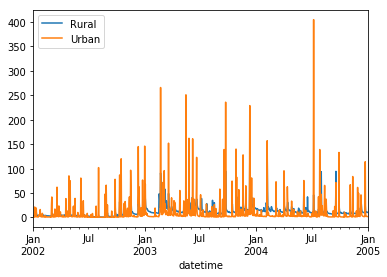

In [6]:
# Let's plot our data to create a hydrograph. plot() is a method that is built-in to dataframes.
Q.plot()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1027c646a58>)

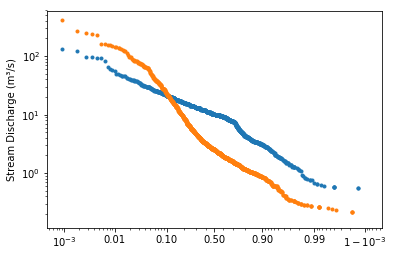

In [7]:
# Let's create a flow duration chart for our two sites!
# .flow_duration is a function included in Hydrofunctions. It accepts dataframes as input.
hf.flow_duration(Q)

## Description of the two sites
If you look carefully at the **hydrograph** above, you can see that the orange urban site tends to have lower baseflow,
but it also tends to have higher peaks during storms. Unfortunately, this obscures the hydrograph for the rural site a little!

The second diagram is a **flow duration chart**. The default Y axis is logarithmic, with values ranging from less than 1 to about 400 cfs. The default X axis uses a logit scale to plot the chance of exceedance. Values range from greater than zero to less than one, with a value of 0.9 meaning that 90% of the flows are higher than this value. The logit scale stretches out the extreme high and extreme low values so that the distance from the center to one standard deviation is approximately the same as from two standard deviations out to three standard deviations. This approximates the probability scale that Flow Duration charts are often plotted on.

Comparing the two sites, you can see that the orange urban site has lower baseflows than the blue rural site, but also has higher peak flows.

In [8]:
# let's compare stats for the two sites!
Q.describe()

,Rural,Urban
count,1097.000000,1097.000000
mean,12.005588,10.456764
std,10.935054,27.932960
min,0.540000,0.170000
25%,5.750000,1.400000
50%,10.000000,2.510000
75%,14.100000,5.820000
max,130.000000,405.000000
